Final Project Submission
Please fill out:

Student name: Bedan Kung'u Njoroge
Student pace: Part time
Scheduled project review date/time:
Instructor name:
Blog post URL: 

Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio, but they don’t know anything about creating movies. 

Objectives

We were tasked with exploring what types of films are currently doing the best at the box offic then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

We will use the following datasets 'bom.movie_gross.csv','title.basics.csv' & 'title.ratings.csv' to answer the following questions;

1.Which are the genres of the 10 most voted movies that Microsoft should consider starting out with and what is the average domestic gross and foreign gross of those genres?

2.Which are the 10 top most average foreign and domestic grossing genres which Microsoft should also consider starting out with? 

3.Which studios had produced the genres with highest voted movies that Microsoft can collaborate with in producing            movies?  

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

Importing Libraries

In [1]:
#importlibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading the bom.movie gross data and reading the Data

In [2]:
#load the datasets
df = pd.read_csv('files/bom.movie_gross.csv')
df.head(10)

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   
5                   The Twilight Saga: Eclipse   Sum.     300500000.0   
6                                   Iron Man 2   Par.     312400000.0   
7                                      Tangled     BV     200800000.0   
8                                Despicable Me   Uni.     251500000.0   
9                     How to Train Your Dragon   P/DW     217600000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
5     398000000  2010  
6     311500000  2010  
7     391000000  2010  
8     291600000  2010  
9     277300000  2010

In [3]:
#read the last 10 rows
df.tail(10)

title      studio  domestic_gross foreign_gross  \
3377               Let Yourself Go        Men.         12200.0           NaN   
3378                 Hannah (2018)         PDF         11700.0           NaN   
3379                      Souvenir      Strand         11400.0           NaN   
3380  Furious (Legend of Kolovrat)     CARUSEL         10000.0           NaN   
3381           Beauty and the Dogs       Osci.          8900.0           NaN   
3382                     The Quake       Magn.          6200.0           NaN   
3383   Edward II (2018 re-release)          FM          4800.0           NaN   
3384                      El Pacto        Sony          2500.0           NaN   
3385                      The Swan  Synergetic          2400.0           NaN   
3386             An Actor Prepares       Grav.          1700.0           NaN   

      year  
3377  2018  
3378  2018  
3379  2018  
3380  2018  
3381  2018  
3382  2018  
3383  2018  
3384  2018  
3385  2018  
3386  2018

Exploring the Data

In [4]:
#checking the data and datatypes
#get the number of rows and columns
df.shape

(3387, 5)

In [5]:
#get overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
#print the column names
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [7]:
#check the data types attributes
df.dtypes      #change foreign_gross to float

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [8]:
#check for statistical summary of the data
df.describe(include ="all")

title studio  domestic_gross foreign_gross         year
count        3387   3382    3.359000e+03          2037  3387.000000
unique       3386    257             NaN          1204          NaN
top     Bluebeard    IFC             NaN       1200000          NaN
freq            2    166             NaN            23          NaN
mean          NaN    NaN    2.874585e+07           NaN  2013.958075
std           NaN    NaN    6.698250e+07           NaN     2.478141
min           NaN    NaN    1.000000e+02           NaN  2010.000000
25%           NaN    NaN    1.200000e+05           NaN  2012.000000
50%           NaN    NaN    1.400000e+06           NaN  2014.000000
75%           NaN    NaN    2.790000e+07           NaN  2016.000000
max           NaN    NaN    9.367000e+08           NaN  2018.000000

In [9]:
#check for missing values
df.isna().head()

title  studio  domestic_gross  foreign_gross   year
0  False   False           False          False  False
1  False   False           False          False  False
2  False   False           False          False  False
3  False   False           False          False  False
4  False   False           False          False  False

In [10]:
#get count of missing values
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
def missing_values(data):
    miss = data.isnull().sum().sort_values(ascending = False)
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)
    return missing

missing_data = missing_values(df)
missing_data

index  Missing Values  Percentage
0   foreign_gross            1350    0.398583
1  domestic_gross              28    0.008267
2          studio               5    0.001476

Foreign_gross has 39.8% missing values thus replace the values with mean or median

In [12]:
# remove the , character from foreign_gross
df['foreign_gross'].replace(",", "", inplace=True, regex=True) # removes ,

In [13]:
#change foreign_gross from string to float
df['foreign_gross'] = df['foreign_gross'].astype(float)

In [14]:
#check the data types now
df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

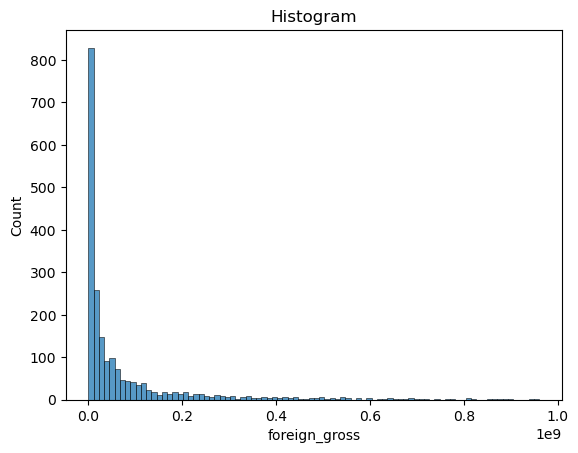

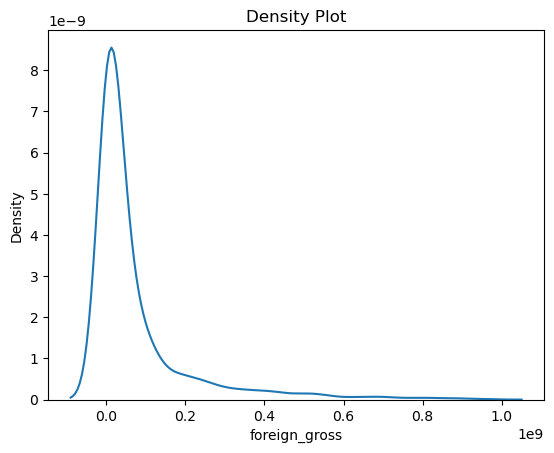

In [15]:
#plotting a histogram and density plot to check on skewness of foreign_gross
#create a histogram
sns.histplot(df['foreign_gross'], kde=False)
plt.title('Histogram')
plt.show()
#create a density plot
sns.kdeplot(df['foreign_gross'])
plt.title('Density Plot')
plt.show()

As seen on the histogram and density plot above foreign_gross is skewed thus median is more appropriate to use replacing the missing values

In [16]:
#get the median of foreign_gross
df['foreign_gross'].median()

18700000.0

In [17]:
#replace missing values in foreign_gross using median
df['foreign_gross'].fillna(df['foreign_gross'].median(), inplace=True)

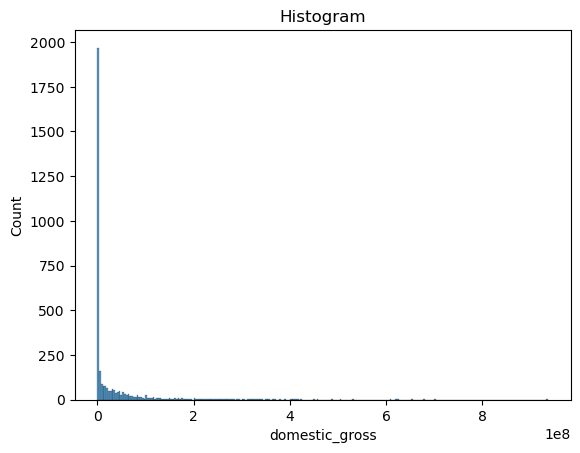

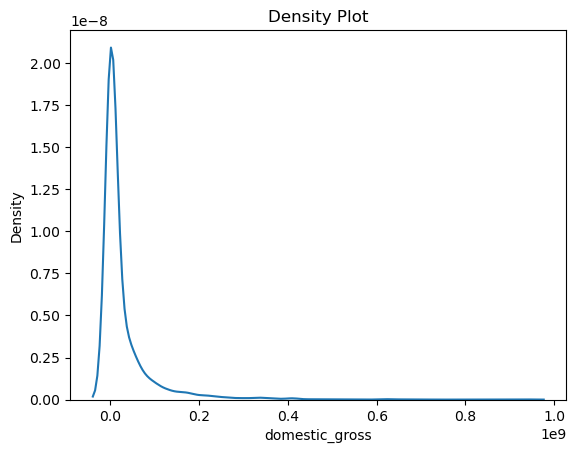

In [18]:
#plotting a histogram and density plot to check on skewness of domestic_gross
#create a histogram
sns.histplot(df['domestic_gross'], kde=False)
plt.title('Histogram')
plt.show()
#create a density plot
sns.kdeplot(df['domestic_gross'])
plt.title('Density Plot')
plt.show()

As seen on the histogram and density plot above domestic_gross is skewed thus median is more appropriate to use in
replacing the missing values

In [19]:
#get the median of foreign_gross
df['domestic_gross'].median()

1400000.0

In [20]:
#replace missing values in foreign_gross using median
df['domestic_gross'].fillna(df['domestic_gross'].median(), inplace=True)

In [27]:
#get count of missing values again
df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [28]:
#replace missing values in studio with N/A
df['studio'].fillna('N/A', inplace=True)

In [29]:
#get count of missing values now
df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [30]:
# Identify duplicate data
duplicate_rows = df[df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []

In [31]:
df.duplicated().sum()

0

We don't have any duplicated rows

<Axes: >

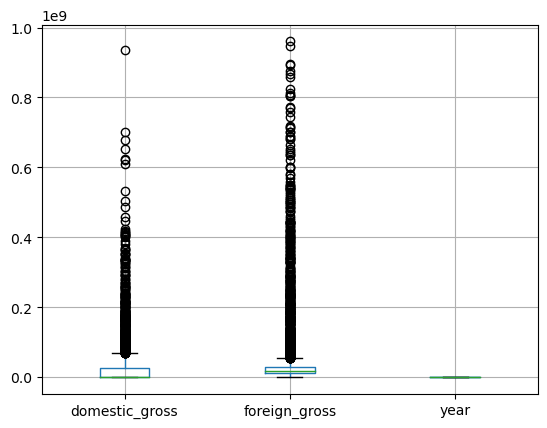

In [32]:
#identify outliers using a box plot
bom_movies_columns = ['domestic_gross', 'foreign_gross', 'year']
df.boxplot(column=bom_movies_columns)

In [33]:
# Identifying outliers using IQR
def IQR_outliers(data, column):
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    return outliers, Q1, Q3, IQR


In [34]:
foreign_gross_outliers = IQR_outliers(df, 'foreign_gross')
foreign_gross_outliers[0]

[652000000.0,
 691300000.0,
 664300000.0,
 535700000.0,
 513900000.0,
 398000000.0,
 311500000.0,
 391000000.0,
 291600000.0,
 277300000.0,
 330000000.0,
 311300000.0,
 275400000.0,
 228000000.0,
 182500000.0,
 245600000.0,
 222400000.0,
 173500000.0,
 216400000.0,
 187900000.0,
 162200000.0,
 240100000.0,
 166800000.0,
 175200000.0,
 193000000.0,
 210700000.0,
 171400000.0,
 109400000.0,
 185500000.0,
 81000000.0,
 194600000.0,
 137700000.0,
 128000000.0,
 106000000.0,
 152100000.0,
 111200000.0,
 124000000.0,
 101300000.0,
 108600000.0,
 92800000.0,
 100000000.0,
 86200000.0,
 116900000.0,
 62300000.0,
 61800000.0,
 84400000.0,
 77800000.0,
 69300000.0,
 90400000.0,
 82300000.0,
 75200000.0,
 68900000.0,
 72500000.0,
 94300000.0,
 70500000.0,
 100200000.0,
 59800000.0,
 64200000.0,
 58200000.0,
 63200000.0,
 75600000.0,
 68600000.0,
 59500000.0,
 960500000.0,
 771400000.0,
 804600000.0,
 430900000.0,
 485300000.0,
 500400000.0,
 416300000.0,
 332300000.0,
 421100000.0,
 370700000.0,


In [35]:
domestic_gross_outliers = IQR_outliers(df, 'domestic_gross')
domestic_gross_outliers[0]

[415000000.0,
 334200000.0,
 296000000.0,
 292600000.0,
 238700000.0,
 300500000.0,
 312400000.0,
 200800000.0,
 251500000.0,
 217600000.0,
 163200000.0,
 104400000.0,
 135500000.0,
 172100000.0,
 176600000.0,
 90800000.0,
 107000000.0,
 148400000.0,
 105300000.0,
 131800000.0,
 148400000.0,
 128000000.0,
 118300000.0,
 95300000.0,
 103100000.0,
 162000000.0,
 76400000.0,
 171200000.0,
 88800000.0,
 97000000.0,
 110500000.0,
 100500000.0,
 80600000.0,
 100200000.0,
 90400000.0,
 84800000.0,
 77200000.0,
 117200000.0,
 119200000.0,
 81600000.0,
 94800000.0,
 92200000.0,
 98700000.0,
 93600000.0,
 80000000.0,
 73000000.0,
 381000000.0,
 352400000.0,
 241100000.0,
 281300000.0,
 209400000.0,
 165200000.0,
 209800000.0,
 254500000.0,
 142600000.0,
 191500000.0,
 149300000.0,
 186800000.0,
 143600000.0,
 176800000.0,
 181000000.0,
 77600000.0,
 176700000.0,
 146400000.0,
 133100000.0,
 85500000.0,
 169100000.0,
 127000000.0,
 123500000.0,
 102500000.0,
 98800000.0,
 83500000.0,
 116600000.0

In [36]:
#Removing and dealing with outliers using IQR
def IQR_remove_outliers(data, column):
    # get values from previous function
    identify = IQR_outliers(data, column)
    Q1 = identify[1]
    Q3 = identify[2]
    IQR = identify[3]
    # remove the outliers
    df = data[~((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))]

    return df

In [37]:
# Removing outliers simultaneously
for i in bom_movies_columns:
  df = IQR_remove_outliers(df, i)

<Axes: >

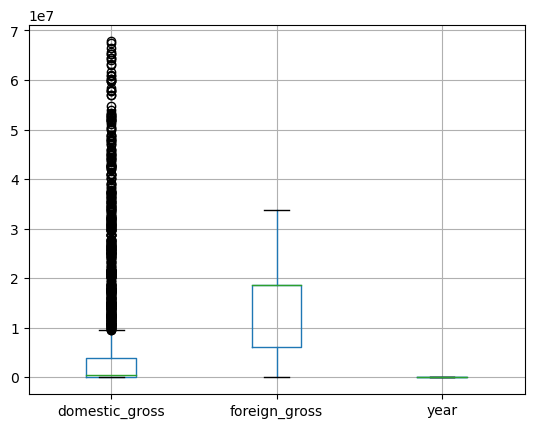

In [38]:
# confirm using a box plot
df.boxplot(column=bom_movies_columns)

Loading the title.basics data and reading the data

In [39]:
#load the datasets of title,basics
df1 = pd.read_csv('files/title.basics.csv')
df1.head(5)

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [40]:
#check the last 5 rows
df1.tail(5)

tconst                                primary_title  \
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
146139                          Kuambil Lagi Hatiku        2019   
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                              Dankyavar Danka        2013   
146142                                       6 Gunn        2017   
146143               Chico Albuquerque - Revelações        2013   

        runtime_minutes       genres  
146139            123.0        Drama  
146140              NaN  Documentary  
146141              NaN       Comedy  
146142            116.0          NaN  
146143              NaN  Documentary

Exploring the data

In [41]:
#checking the data and datatypes
#get the number of rows and columns
df1.shape

(146144, 6)

In [42]:
#get overview of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [43]:
#print the column names
df1.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [44]:
#check the data types attributes
df1.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [45]:
#check for statistical summary of the data
df1.describe(include ="all")

tconst primary_title original_title     start_year  \
count      146144        146144         146123  146144.000000   
unique     146144        136071         137773            NaN   
top     tt0063540          Home         Broken            NaN   
freq            1            24             19            NaN   
mean          NaN           NaN            NaN    2014.621798   
std           NaN           NaN            NaN       2.733583   
min           NaN           NaN            NaN    2010.000000   
25%           NaN           NaN            NaN    2012.000000   
50%           NaN           NaN            NaN    2015.000000   
75%           NaN           NaN            NaN    2017.000000   
max           NaN           NaN            NaN    2115.000000   

        runtime_minutes       genres  
count     114405.000000       140736  
unique              NaN         1085  
top                 NaN  Documentary  
freq                NaN        32185  
mean          86.187247          NaN  
std          166.360590          NaN  
min            1.000000          NaN  
25%           70.000000          NaN  
50%           87.000000          NaN  
75%           99.000000          NaN  
max        51420.000000          NaN

In [46]:
#check for missing values
df1.isna().head()

tconst  primary_title  original_title  start_year  runtime_minutes  genres
0   False          False           False       False            False   False
1   False          False           False       False            False   False
2   False          False           False       False            False   False
3   False          False           False       False             True   False
4   False          False           False       False            False   False

In [47]:
#get count of missing values
df1.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [48]:
def missing_values(data):
    miss = data.isnull().sum().sort_values(ascending = False)
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)
    return missing

missing_data = missing_values(df1)
missing_data

index  Missing Values  Percentage
0  runtime_minutes           31739    0.217176
1           genres            5408    0.037005
2   original_title              21    0.000144

runtime_minutes 39.8% missing values thus replace the values with mean or median

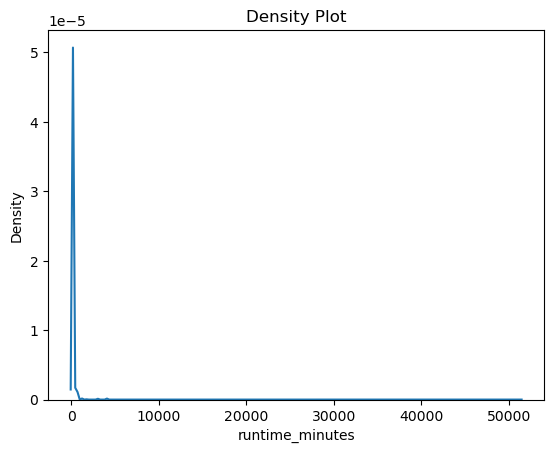

In [49]:
#plotting a density plot to check on skewness of runtime_minutes
#create a density plot
sns.kdeplot(df1['runtime_minutes'])
plt.title('Density Plot')
plt.show()

as seen on the density plot above runtime_minutes is skewed thus median is more appropriate to use in replacing the missing values

In [50]:
#get the median of runtime_minutes
df1['runtime_minutes'].median()

87.0

In [51]:
#replace missing values in foreign_gross using median
df1['runtime_minutes'].fillna(df1['runtime_minutes'].median(), inplace=True)

In [52]:
#get count of missing values again
df1.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [53]:
#replace missing values in original_title with N/A
df1['original_title'].fillna('N/A', inplace=True)

In [54]:
#replace missing values in genres with N/A
df1['genres'].fillna('N/A', inplace=True)

In [55]:
#get count of missing values again
df1.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [56]:
# Identify duplicate data
duplicate_rows = df1[df1.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [tconst, primary_title, original_title, start_year, runtime_minutes, genres]
Index: []

In [57]:
df1.duplicated().sum()

0

we don't have any duplicated rows

<Axes: >

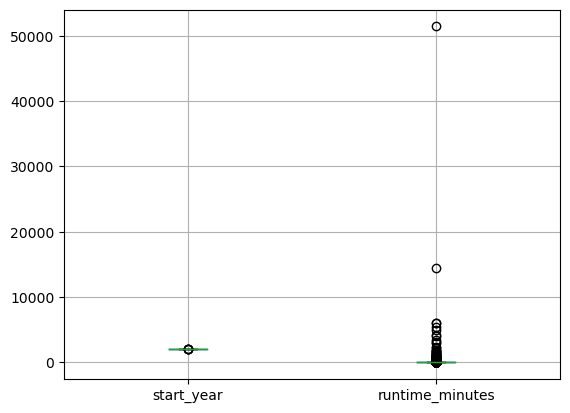

In [58]:
#identify outliers using a box plot
title_basics_columns = ['start_year', 'runtime_minutes']
df1.boxplot(column=title_basics_columns)

In [59]:
# Getting outliers using IQR
def IQR_outliers(data, column):
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])


    return outliers, Q1, Q3, IQR

In [60]:
runtime_minutes_outliers = IQR_outliers(df1, 'runtime_minutes')
runtime_minutes_outliers[0]

[175.0,
 136.0,
 180.0,
 160.0,
 134.0,
 44.0,
 40.0,
 137.0,
 280.0,
 132.0,
 181.0,
 144.0,
 127.0,
 150.0,
 134.0,
 132.0,
 141.0,
 128.0,
 127.0,
 132.0,
 163.0,
 150.0,
 129.0,
 139.0,
 161.0,
 143.0,
 130.0,
 200.0,
 150.0,
 131.0,
 169.0,
 143.0,
 133.0,
 133.0,
 169.0,
 146.0,
 136.0,
 140.0,
 126.0,
 132.0,
 180.0,
 128.0,
 134.0,
 150.0,
 141.0,
 141.0,
 13.0,
 15.0,
 126.0,
 158.0,
 140.0,
 144.0,
 143.0,
 142.0,
 136.0,
 20.0,
 156.0,
 154.0,
 130.0,
 27.0,
 136.0,
 180.0,
 11.0,
 11.0,
 8.0,
 139.0,
 148.0,
 31.0,
 135.0,
 16.0,
 135.0,
 135.0,
 288.0,
 180.0,
 136.0,
 197.0,
 133.0,
 144.0,
 146.0,
 130.0,
 135.0,
 145.0,
 151.0,
 135.0,
 208.0,
 16.0,
 136.0,
 126.0,
 140.0,
 222.0,
 43.0,
 127.0,
 132.0,
 155.0,
 137.0,
 137.0,
 30.0,
 162.0,
 174.0,
 128.0,
 150.0,
 226.0,
 5.0,
 137.0,
 4.0,
 140.0,
 26.0,
 12.0,
 134.0,
 192.0,
 139.0,
 148.0,
 130.0,
 129.0,
 151.0,
 134.0,
 141.0,
 134.0,
 150.0,
 260.0,
 154.0,
 156.0,
 130.0,
 132.0,
 165.0,
 128.0,
 30.0,
 131.0

In [61]:
start_year_outliers = IQR_outliers(df1, 'start_year')
start_year_outliers[0]

[2026, 2025, 2115, 2027]

In [62]:
#Removing and dealing with outliers using IQR
def IQR_remove_outliers(data, column):
    # get values from previous function
    identify = IQR_outliers(data, column)
    Q1 = identify[1]
    Q3 = identify[2]
    IQR = identify[3]
    # remove the outliers
    df1 = data[~((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))]
    
    return df1    
    

In [63]:
# Removing outliers simultaneously
for i in title_basics_columns:
  df1 = IQR_remove_outliers(df1, i)

<Axes: >

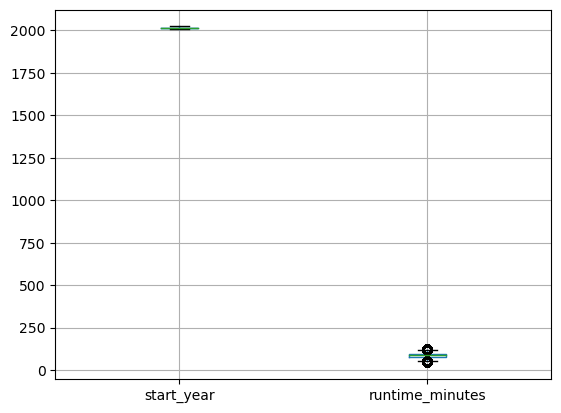

In [64]:
# confirm using a box plot
df1.boxplot(column=title_basics_columns)

Loading the title.ratings data and reading the data

In [65]:
#load datasets for title.ratings
df2 = pd.read_csv('files/title.ratings.csv')
df2.head(10)

tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21
5   tt1069246            6.2       326
6   tt1094666            7.0      1613
7   tt1130982            6.4       571
8   tt1156528            7.2       265
9   tt1161457            4.2       148

In [66]:
#check the last 5 rows
df2.tail(5)

tconst  averagerating  numvotes
73851  tt9805820            8.1        25
73852  tt9844256            7.5        24
73853  tt9851050            4.7        14
73854  tt9886934            7.0         5
73855  tt9894098            6.3       128

Exploring the data

In [67]:
#checking the data and datatypes
#get the number of rows and columns
df2.shape

(73856, 3)

In [68]:
#get overview of the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [69]:
#print the column names
df2.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [70]:
#check the data types attributes
df2.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [71]:
#check for statistical summary of the data
df2.describe(include ="all")

tconst  averagerating      numvotes
count        73856   73856.000000  7.385600e+04
unique       73856            NaN           NaN
top     tt10356526            NaN           NaN
freq             1            NaN           NaN
mean           NaN       6.332729  3.523662e+03
std            NaN       1.474978  3.029402e+04
min            NaN       1.000000  5.000000e+00
25%            NaN       5.500000  1.400000e+01
50%            NaN       6.500000  4.900000e+01
75%            NaN       7.400000  2.820000e+02
max            NaN      10.000000  1.841066e+06

In [72]:
#check for missing values
df2.isna().head()

tconst  averagerating  numvotes
0   False          False     False
1   False          False     False
2   False          False     False
3   False          False     False
4   False          False     False

In [73]:
#get count of missing values
df2.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

no missing values

In [74]:
#Identify duplicate data
duplicate_rows = df2[df2.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [tconst, averagerating, numvotes]
Index: []

In [75]:
df2.duplicated().sum()

0

no duplicate values

<Axes: >

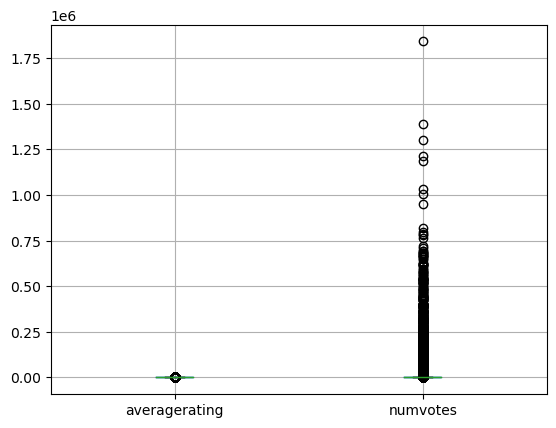

In [76]:
#identify outliers using a box plot
title_ratings_columns = ['averagerating', 'numvotes']
df2.boxplot(column=title_ratings_columns)

In [77]:
# Getting outliers using IQR
def IQR_outliers(data, column):
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])


    return outliers, Q1, Q3, IQR

In [79]:
averagerating_outliers = IQR_outliers(df2, 'averagerating')
averagerating_outliers[0]

[2.1,
 2.5,
 2.6,
 2.0,
 2.4,
 1.4,
 1.9,
 1.0,
 1.7,
 2.4,
 2.3,
 1.7,
 2.3,
 2.1,
 1.7,
 2.6,
 2.3,
 2.6,
 2.4,
 2.4,
 2.2,
 2.3,
 2.0,
 1.0,
 2.1,
 1.9,
 2.6,
 1.4,
 2.4,
 2.1,
 2.1,
 2.6,
 2.1,
 1.2,
 1.1,
 2.6,
 2.5,
 1.2,
 1.2,
 2.5,
 2.4,
 2.4,
 2.4,
 2.3,
 2.2,
 1.9,
 1.7,
 2.0,
 2.4,
 1.2,
 2.1,
 2.5,
 2.2,
 1.9,
 2.6,
 2.4,
 2.5,
 1.8,
 1.9,
 1.5,
 1.4,
 2.5,
 2.6,
 1.8,
 2.6,
 2.1,
 1.8,
 2.6,
 2.4,
 2.4,
 2.3,
 1.6,
 1.0,
 1.9,
 2.4,
 1.6,
 1.9,
 1.9,
 2.5,
 2.5,
 1.9,
 2.1,
 2.3,
 1.5,
 2.4,
 2.4,
 1.3,
 1.9,
 1.8,
 1.2,
 2.0,
 2.6,
 1.7,
 1.8,
 2.2,
 1.8,
 1.4,
 2.6,
 2.3,
 2.3,
 1.6,
 2.4,
 2.0,
 2.5,
 2.3,
 1.8,
 2.1,
 1.1,
 2.6,
 2.4,
 2.2,
 2.1,
 1.2,
 2.2,
 2.0,
 2.4,
 1.0,
 2.5,
 1.7,
 1.2,
 2.6,
 2.4,
 2.5,
 2.5,
 2.5,
 2.4,
 2.2,
 1.0,
 2.0,
 1.5,
 1.4,
 1.8,
 1.7,
 2.4,
 1.4,
 2.1,
 1.6,
 2.3,
 2.3,
 2.6,
 2.6,
 1.5,
 2.5,
 2.6,
 2.4,
 1.7,
 2.1,
 2.5,
 2.5,
 1.1,
 2.0,
 2.6,
 2.2,
 2.3,
 1.3,
 2.6,
 1.9,
 2.6,
 2.6,
 2.1,
 1.6,
 2.0,
 2.6,
 2.6,
 2.5,
 2.6,
 2.0

In [80]:
numvotes_outliers = IQR_outliers(df2, 'numvotes')
numvotes_outliers[0]

[50352,
 1613,
 8296,
 2381,
 5494,
 326657,
 87288,
 941,
 428142,
 477771,
 2725,
 54646,
 69199,
 1413,
 5728,
 44490,
 6688,
 2527,
 18431,
 54421,
 4240,
 738,
 1621,
 1293,
 4302,
 5257,
 6220,
 1701,
 129443,
 1768,
 1502,
 10025,
 6990,
 5273,
 1497,
 2306,
 3713,
 398695,
 1447,
 2189,
 875,
 387402,
 3218,
 821,
 85839,
 1522,
 66303,
 2137,
 1071,
 59914,
 1360,
 1636,
 28994,
 9089,
 4670,
 79337,
 1603,
 18206,
 12506,
 4869,
 621193,
 27146,
 2553,
 15096,
 2826,
 757,
 5997,
 3321,
 133887,
 2309,
 7229,
 6636,
 7359,
 2280,
 18038,
 3526,
 799,
 848,
 3159,
 1890,
 7643,
 1969,
 1503,
 878,
 10445,
 167680,
 10042,
 182320,
 1394,
 7930,
 1826,
 959,
 2615,
 1598,
 25267,
 3455,
 1454,
 731,
 1490,
 4189,
 873,
 2972,
 7728,
 1466,
 1105,
 793,
 867,
 1842,
 13943,
 10725,
 1054,
 921,
 2218,
 8071,
 4753,
 725,
 43409,
 1420,
 975,
 1509,
 77709,
 86137,
 11358,
 1888,
 2111,
 8662,
 691835,
 657690,
 1321,
 740,
 2397,
 839,
 26441,
 138872,
 5658,
 1388,
 105633,
 78

In [81]:
#Removing and dealing with outliers using IQR
def IQR_remove_outliers(data, column):
    # get values from previous function
    identify = IQR_outliers(data, column)
    Q1 = identify[1]
    Q3 = identify[2]
    IQR = identify[3]
    # remove the outliers
    df2 = data[~((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))]
    
    return df2  

In [82]:
def remove_outliers_iqr(df2, column, lower_bound=0.25, upper_bound=0.75):
    q1 = df2[column].quantile(lower_bound)
    q3 = df2[column].quantile(upper_bound)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df2_filtered = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
    return d2f_filtered

In [83]:
# Removing outliers simultaneously
for i in title_ratings_columns:
  df2 = IQR_remove_outliers(df2, i)

<Axes: >

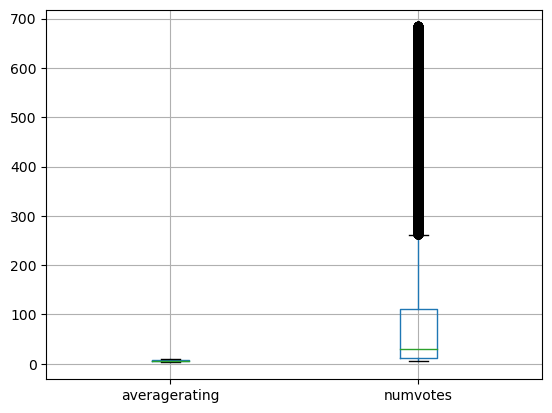

In [84]:
# confirm using a box plot
df2.boxplot(column=title_ratings_columns)

Merging the files, addressing the objectives and data visualization

In [85]:
#add a column title using primary_title to be used as a common column in merging
df1['title'] = df1['primary_title']
df1.head()

tconst                    primary_title              original_title  \
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
5  tt0111414                      A Thin Life                 A Thin Life   

   start_year  runtime_minutes                genres  \
1        2019            114.0       Biography,Drama   
2        2018            122.0                 Drama   
3        2018             87.0          Comedy,Drama   
4        2017             80.0  Comedy,Drama,Fantasy   
5        2018             75.0                Comedy   

                             title  
1  One Day Before the Rainy Season  
2       The Other Side of the Wind  
3                  Sabse Bada Sukh  
4         The Wandering Soap Opera  
5                      A Thin Life

In [86]:
#merge the csvs
merged_df = pd.merge(df1, df2, on= 'tconst')
merged_df.head()

tconst                    primary_title         original_title  \
0  tt0066787  One Day Before the Rainy Season        Ashad Ka Ek Din   
1  tt0069204                  Sabse Bada Sukh        Sabse Bada Sukh   
2  tt0100275         The Wandering Soap Opera  La Telenovela Errante   
3  tt0112502                          Bigfoot                Bigfoot   
4  tt0137204                  Joe Finds Grace        Joe Finds Grace   

   start_year  runtime_minutes                      genres  \
0        2019            114.0             Biography,Drama   
1        2018             87.0                Comedy,Drama   
2        2017             80.0        Comedy,Drama,Fantasy   
3        2017             87.0             Horror,Thriller   
4        2017             83.0  Adventure,Animation,Comedy   

                             title  averagerating  numvotes  
0  One Day Before the Rainy Season            7.2        43  
1                  Sabse Bada Sukh            6.1        13  
2         The Wandering Soap Opera            6.5       119  
3                          Bigfoot            4.1        32  
4                  Joe Finds Grace            8.1       263

In [87]:
#merge all 3 csvs
merged_df1 = pd.merge(merged_df, df, on='title')
merged_df1.head()

tconst           primary_title          original_title  start_year  \
0  tt0419692              Disconnect              Disconnect        2010   
1  tt8413566              Disconnect              Disconnect        2018   
2  tt0498351  The Hero of Color City  The Hero of Color City        2014   
3  tt0800054           The Guardians           The Guardians        2010   
4  tt6901956           The Guardians           The Guardians        2017   

   runtime_minutes                   genres                   title  \
0            112.0     Drama,Mystery,Sci-Fi              Disconnect   
1            107.0           Comedy,Romance              Disconnect   
2             77.0         Animation,Family  The Hero of Color City   
3             88.0            Comedy,Family           The Guardians   
4             46.0  Action,Adventure,Comedy           The Guardians   

   averagerating  numvotes studio  domestic_gross  foreign_gross  year  
0            4.5       190     LD       1400000.0     18700000.0  2013  
1            8.1        15     LD       1400000.0     18700000.0  2013  
2            4.0       431  Magn.         32200.0     18700000.0  2014  
3            7.8        68   MBox        177000.0     18700000.0  2018  
4            4.1         7   MBox        177000.0     18700000.0  2018

Obj 1:Which are the genres of the 10 most voted movies that Microsoft should consider starting out with and what is the              average domestic gross and foreign gross of those genres?

In [88]:
# Group by 'genres' and calculate the highest number of votes for each genre
genres_num_votes = merged_df1.groupby('genres')['numvotes'].sum()
# Sort the results in descending order to see the genres with the highest average votes first
genres_num_votes = genres_num_votes.sort_values(ascending=False)
genres_num_votes

genres
Drama                        11906
Drama,Romance                 4716
Documentary                   4106
Comedy                        3200
Comedy,Drama                  2512
                             ...  
Documentary,Drama               10
Action,Sport                     8
Documentary,Drama,Romance        5
Action,Comedy,Drama              5
Documentary,Family               5
Name: numvotes, Length: 100, dtype: int64

In [89]:
top_genres_num_votes = genres_num_votes[:10]
top_genres_num_votes

genres
Drama                11906
Drama,Romance         4716
Documentary           4106
Comedy                3200
Comedy,Drama          2512
Thriller              1707
Drama,Thriller        1675
Horror                1653
Documentary,Music     1601
Comedy,Romance        1510
Name: numvotes, dtype: int64

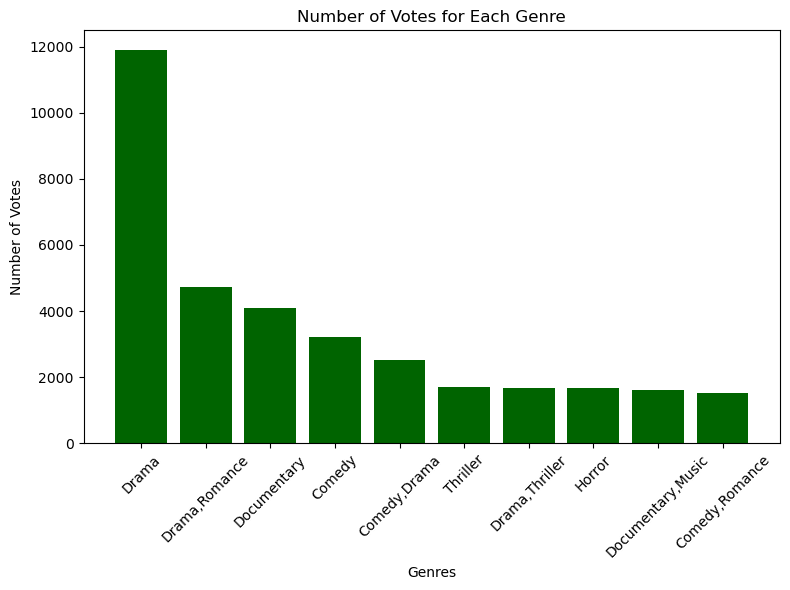

In [90]:
# Plot histogram to show genres with highest number of votes for movies produced
plt.figure(figsize=(8, 6))
plt.bar(top_genres_num_votes.index, top_genres_num_votes.values, color='darkgreen')
# Adding labels and title
plt.xlabel('Genres')
plt.ylabel('Number of Votes')
plt.title('Number of Votes for Each Genre')
# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

In [91]:
#Group by genres and highest number of votes with their respective average foreign gross
# Group by 'genres' and find the top 10 genres with the highest number of votes
top_10_genres_votes = merged_df1.groupby('genres')['numvotes'].sum().nlargest(10)
top_10_genres_votes.sort_values(ascending=False)

# Filter the DataFrame to include only the rows corresponding to the top 10 genres based on votes
top_10_genres_df = merged_df1[merged_df1['genres'].isin(top_10_genres_votes.index)]

top_10_genres_df
# Group by 'genres' and calculate the average gross income for each of the top 5 genres
average_gross_income_top_10_genres = top_10_genres_df.groupby('genres')['foreign_gross'].mean()
average_gross_income_top_10_genres

pd.concat([top_10_genres_votes, average_gross_income_top_10_genres.sort_values(ascending=False)], axis=1)


numvotes  foreign_gross
genres                                    
Drama                 11906   1.353164e+07
Drama,Romance          4716   1.749231e+07
Documentary            4106   1.145915e+07
Comedy                 3200   1.338406e+07
Comedy,Drama           2512   1.166910e+07
Thriller               1707   1.611538e+07
Drama,Thriller         1675   1.388497e+07
Horror                 1653   1.339368e+07
Documentary,Music      1601   1.250633e+07
Comedy,Romance         1510   1.870000e+07

In [92]:
grouped = pd.concat([top_10_genres_votes, average_gross_income_top_10_genres.sort_values(ascending=False)], axis=1)
grouped

numvotes  foreign_gross
genres                                    
Drama                 11906   1.353164e+07
Drama,Romance          4716   1.749231e+07
Documentary            4106   1.145915e+07
Comedy                 3200   1.338406e+07
Comedy,Drama           2512   1.166910e+07
Thriller               1707   1.611538e+07
Drama,Thriller         1675   1.388497e+07
Horror                 1653   1.339368e+07
Documentary,Music      1601   1.250633e+07
Comedy,Romance         1510   1.870000e+07

In [93]:
grouped = grouped.reset_index()
grouped

genres  numvotes  foreign_gross
0              Drama     11906   1.353164e+07
1      Drama,Romance      4716   1.749231e+07
2        Documentary      4106   1.145915e+07
3             Comedy      3200   1.338406e+07
4       Comedy,Drama      2512   1.166910e+07
5           Thriller      1707   1.611538e+07
6     Drama,Thriller      1675   1.388497e+07
7             Horror      1653   1.339368e+07
8  Documentary,Music      1601   1.250633e+07
9     Comedy,Romance      1510   1.870000e+07

In [94]:
# Extract sorted genres and average foreign gross
sorted_genres = grouped['genres']
average_foreign_gross = grouped['foreign_gross']

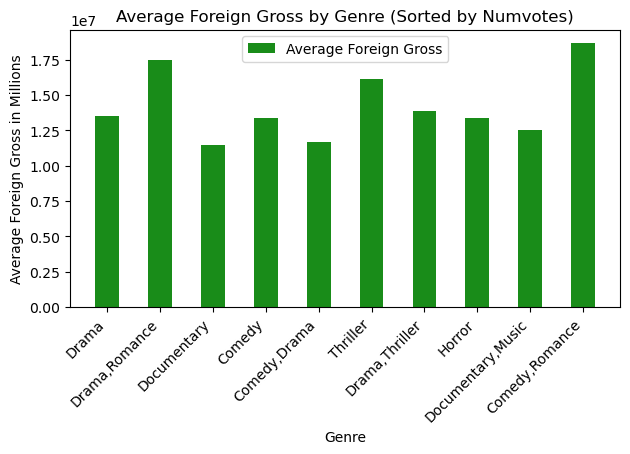

In [95]:
# Create positions for the bars on the x-axis
x = np.arange(len(sorted_genres))

# Width of the bars
bar_width = 0.45

# Plotting
fig, ax = plt.subplots()

# Bar plot for average foreign gross
ax.bar(x, average_foreign_gross, bar_width, color='g', alpha=0.9, label='Average Foreign Gross')

# Set labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Average Foreign Gross in Millions')
ax.set_title('Average Foreign Gross by Genre (Sorted by Numvotes)')
ax.set_xticks(x)
ax.set_xticklabels(sorted_genres, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()

In [96]:
#Group by genres and highest number of votes with their respective average domestic gross
# Group by 'genres' and find the top 10 genres with the highest number of votes
top_10_genres_votes = merged_df1.groupby('genres')['numvotes'].sum().nlargest(10)
top_10_genres_votes.sort_values(ascending=False)

# Filter the DataFrame to include only the rows corresponding to the top 10 genres based on votes
top_10_genres_df = merged_df1[merged_df1['genres'].isin(top_10_genres_votes.index)]

top_10_genres_df
# Group by 'genres' and calculate the average gross income for each of the top 5 genres
avg_domestic_gross_income_top_10_genres = top_10_genres_df.groupby('genres')['domestic_gross'].mean()
avg_domestic_gross_income_top_10_genres

pd.concat([top_10_genres_votes, avg_domestic_gross_income_top_10_genres.sort_values(ascending=False)], axis=1)

numvotes  domestic_gross
genres                                     
Drama                 11906    4.221909e+06
Drama,Romance          4716    1.109262e+06
Documentary            4106    7.572648e+06
Comedy                 3200    3.810862e+06
Comedy,Drama           2512    9.791410e+06
Thriller               1707    9.069346e+06
Drama,Thriller         1675    3.589280e+06
Horror                 1653    7.119047e+06
Documentary,Music      1601    9.383333e+05
Comedy,Romance         1510    6.559429e+05

In [97]:
grouped2 = pd.concat([top_10_genres_votes, avg_domestic_gross_income_top_10_genres.sort_values(ascending=False)], axis=1)
grouped2

numvotes  domestic_gross
genres                                     
Drama                 11906    4.221909e+06
Drama,Romance          4716    1.109262e+06
Documentary            4106    7.572648e+06
Comedy                 3200    3.810862e+06
Comedy,Drama           2512    9.791410e+06
Thriller               1707    9.069346e+06
Drama,Thriller         1675    3.589280e+06
Horror                 1653    7.119047e+06
Documentary,Music      1601    9.383333e+05
Comedy,Romance         1510    6.559429e+05

In [98]:
grouped2 = grouped2.reset_index()
grouped2

genres  numvotes  domestic_gross
0              Drama     11906    4.221909e+06
1      Drama,Romance      4716    1.109262e+06
2        Documentary      4106    7.572648e+06
3             Comedy      3200    3.810862e+06
4       Comedy,Drama      2512    9.791410e+06
5           Thriller      1707    9.069346e+06
6     Drama,Thriller      1675    3.589280e+06
7             Horror      1653    7.119047e+06
8  Documentary,Music      1601    9.383333e+05
9     Comedy,Romance      1510    6.559429e+05

In [99]:
# Extract sorted genres and average foreign gross
sorted_genres2 = grouped2['genres']
average_domestic_gross = grouped2['domestic_gross']

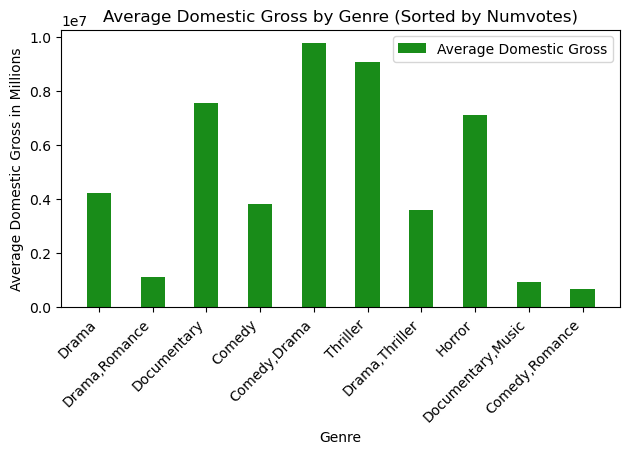

In [100]:
# Create positions for the bars on the x-axis
x = np.arange(len(sorted_genres))

# Width of the bars
bar_width = 0.45

# Plotting
fig, ax = plt.subplots()

# Bar plot for average foreign gross
ax.bar(x, average_domestic_gross, bar_width, color='g', alpha=0.9, label='Average Domestic Gross')

# Set labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Average Domestic Gross in Millions')
ax.set_title('Average Domestic Gross by Genre (Sorted by Numvotes)')
ax.set_xticks(x)
ax.set_xticklabels(sorted_genres, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()

Obj 2:Which are the 10 top most average foreign and domestic grossing genres which Microsoft should also consider starting           out with? 

In [101]:
# Group by 'genres' and calculate the average foreign gross for each genre
genres_avg_foreign_gross = merged_df1.groupby('genres')['foreign_gross'].mean()
# Sort the results in descending order to see the genres with the highest average votes first
genres_avg_foreign_gross = genres_avg_foreign_gross.sort_values(ascending=False)
genres_avg_foreign_gross

genres
Drama,Music,Musical              23800000.0
Adventure,Comedy,Horror          21200000.0
Mystery                          20050000.0
Crime                            18700000.0
Documentary,Drama                18700000.0
                                    ...    
Fantasy                           1400000.0
Adventure                         1100000.0
Comedy,Horror,Thriller             552000.0
Comedy,Drama,Music                 520000.0
Biography,Documentary,History       25050.0
Name: foreign_gross, Length: 100, dtype: float64

In [102]:
top_foreign_gross_genres = genres_avg_foreign_gross[:10]
top_foreign_gross_genres

genres
Drama,Music,Musical             23800000.0
Adventure,Comedy,Horror         21200000.0
Mystery                         20050000.0
Crime                           18700000.0
Documentary,Drama               18700000.0
Biography,Documentary,Drama     18700000.0
Biography,Documentary,Family    18700000.0
Drama,Mystery,Sci-Fi            18700000.0
Biography,Documentary,Music     18700000.0
Drama,Mystery                   18700000.0
Name: foreign_gross, dtype: float64

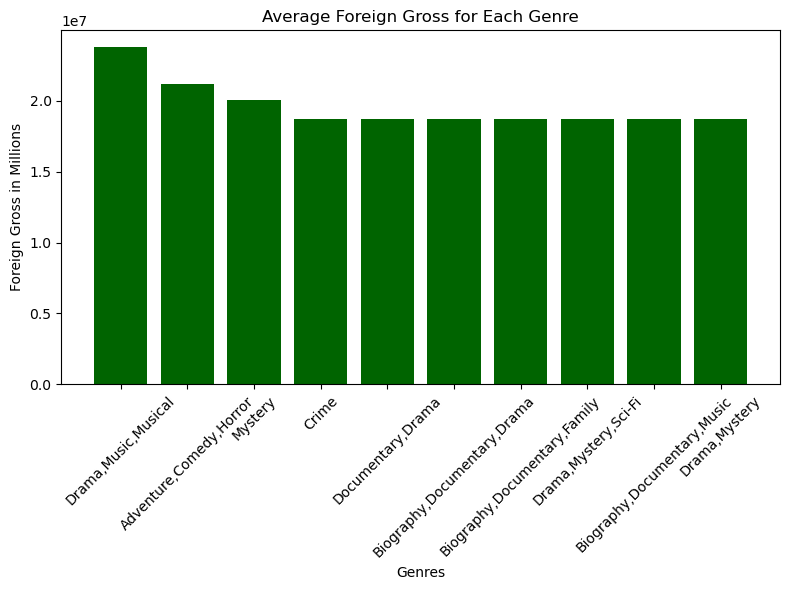

In [103]:
# Plot histogram to show genres with highest average foreign gross for movies produced
plt.figure(figsize=(8, 6))
plt.bar(top_foreign_gross_genres.index, top_foreign_gross_genres.values, color='darkgreen')
# Adding labels and title
plt.xlabel('Genres')
plt.ylabel('Foreign Gross in Millions')
plt.title('Average Foreign Gross for Each Genre')
# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

In [104]:
# Group by 'genres' and calculate the average domestic gross for each genre
genres_avg_domestic_gross = merged_df1.groupby('genres')['domestic_gross'].mean()
# Sort the results in descending order to see the genres with the highest average votes first
genres_avg_domestic_gross = genres_avg_domestic_gross.sort_values(ascending=False)
genres_avg_domestic_gross

genres
Drama,Music,Musical             38300000.0
Action,Sci-Fi,Thriller          33700000.0
Adventure,Comedy,Horror         30600000.0
Drama,Mystery,Thriller          28400000.0
Drama,Fantasy,Horror            26600000.0
                                   ...    
Action,Drama                       19500.0
Action,Comedy,Drama                17700.0
Action,Crime,Thriller              16800.0
Action,Drama,Romance               10700.0
Documentary,History,Thriller        7100.0
Name: domestic_gross, Length: 100, dtype: float64

In [105]:
top_domestic_gross_genres = genres_avg_domestic_gross[:10]
top_domestic_gross_genres

genres
Drama,Music,Musical        3.830000e+07
Action,Sci-Fi,Thriller     3.370000e+07
Adventure,Comedy,Horror    3.060000e+07
Drama,Mystery,Thriller     2.840000e+07
Drama,Fantasy,Horror       2.660000e+07
Biography,Drama            1.851700e+07
Comedy,Drama,Romance       1.672618e+07
Action,History             1.640000e+07
N/A                        1.596967e+07
Documentary,History        1.331315e+07
Name: domestic_gross, dtype: float64

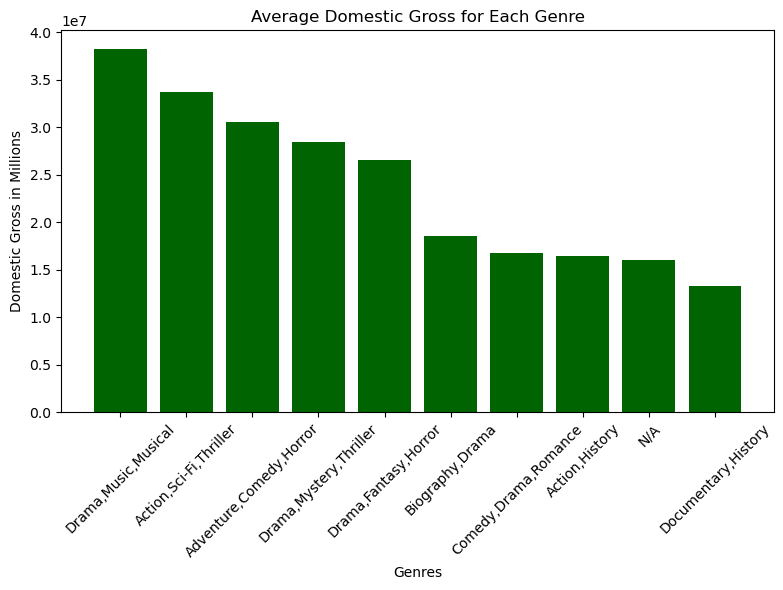

In [106]:
# Plot histogram to show genres with highest average domestic gross for movies produced
plt.figure(figsize=(8, 6))
plt.bar(top_domestic_gross_genres.index, top_domestic_gross_genres.values, color='darkgreen')
# Adding labels and title
plt.xlabel('Genres')
plt.ylabel('Domestic Gross in Millions')
plt.title('Average Domestic Gross for Each Genre')
# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

Obj 3: Which studios had produced the genres with highest voted movies that Microsoft can collaborate with in producing                movies?  

In [107]:
# Group the data by 'genres' and 'studio' to find the highest number of votes within each genre for each studio
grouped_df = merged_df1.groupby(['genres', 'studio'])['numvotes'].max()
sorted_grouped_df = grouped_df.sort_values(ascending=False).reset_index()
sorted_grouped_df

genres  studio  numvotes
0         Action,Drama,Mystery      CJ       681
1                Drama,Romance      CL       676
2                Drama,Romance    FRun       669
3                 Comedy,Drama   Cohen       655
4            Documentary,Music     SPC       653
..                         ...     ...       ...
290         Documentary,Family  Strand         5
291                   Thriller     LGF         5
292  Documentary,Drama,Romance      FM         5
293        Action,Comedy,Drama     Da.         5
294                   Thriller    TriS         5

[295 rows x 3 columns]

In [108]:
top_sorted_grouped_df = sorted_grouped_df[:10]
top_sorted_grouped_df                                     

genres studio  numvotes
0    Action,Drama,Mystery     CJ       681
1           Drama,Romance     CL       676
2           Drama,Romance   FRun       669
3            Comedy,Drama  Cohen       655
4       Documentary,Music    SPC       653
5                   Drama     FM       648
6           Drama,Romance  Wein.       643
7                   Drama     KL       642
8  Drama,Mystery,Thriller  Focus       624
9               Animation    FUN       621

In [109]:
#Using pivots to have data on genres, studion and numvotes
pivot = top_sorted_grouped_df .pivot(index="genres", columns="studio", values="numvotes")
pivot.head()

studio                   CJ  CL  Cohen     FM  FRun    FUN  Focus     KL  \
genres                                                                     
Action,Drama,Mystery  681.0 NaN    NaN    NaN   NaN    NaN    NaN    NaN   
Animation               NaN NaN    NaN    NaN   NaN  621.0    NaN    NaN   
Comedy,Drama            NaN NaN  655.0    NaN   NaN    NaN    NaN    NaN   
Documentary,Music       NaN NaN    NaN    NaN   NaN    NaN    NaN    NaN   
Drama                   NaN NaN    NaN  648.0   NaN    NaN    NaN  642.0   

studio                  SPC  Wein.  
genres                              
Action,Drama,Mystery    NaN    NaN  
Animation               NaN    NaN  
Comedy,Drama            NaN    NaN  
Documentary,Music     653.0    NaN  
Drama                   NaN    NaN

In [110]:
pivot = pivot.reset_index()
pivot.head()

studio                genres     CJ  CL  Cohen     FM  FRun    FUN  Focus  \
0       Action,Drama,Mystery  681.0 NaN    NaN    NaN   NaN    NaN    NaN   
1                  Animation    NaN NaN    NaN    NaN   NaN  621.0    NaN   
2               Comedy,Drama    NaN NaN  655.0    NaN   NaN    NaN    NaN   
3          Documentary,Music    NaN NaN    NaN    NaN   NaN    NaN    NaN   
4                      Drama    NaN NaN    NaN  648.0   NaN    NaN    NaN   

studio     KL    SPC  Wein.  
0         NaN    NaN    NaN  
1         NaN    NaN    NaN  
2         NaN    NaN    NaN  
3         NaN  653.0    NaN  
4       642.0    NaN    NaN

<Axes: >

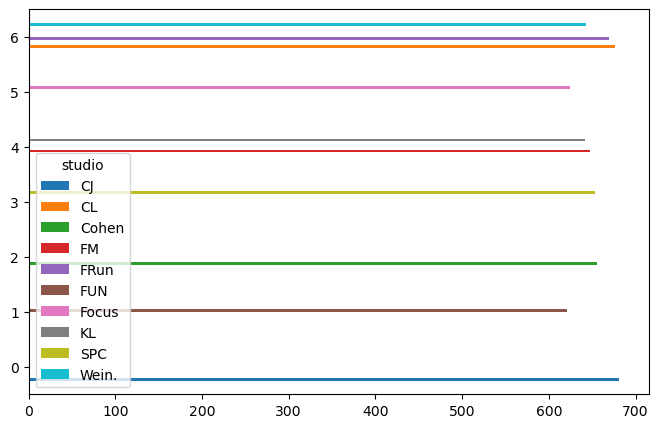

In [111]:
#Visualizing Data With Pivot Tables
pivot.plot(kind="barh", figsize=(8,5))

<Axes: ylabel='genres'>

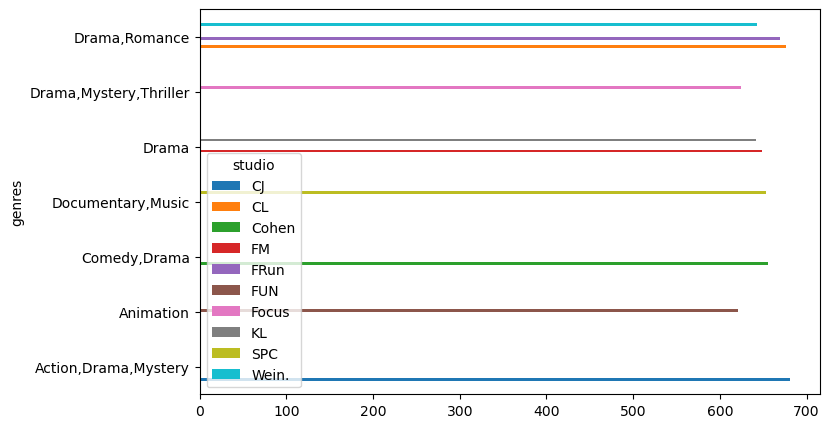

In [112]:
#set genres as the index
pivot.set_index("genres").plot(kind="barh", figsize=(8,5))

Conclusion

1.Insight from objective 1
a)In terms of number of votes Microsoft should consider investing drama, drama & romance &  documentary as they the most voted genres of movies.
b)Considering top most number of votes and foreign gross Microsoft should consider investing in comedy & romance, drama & romance and thriller as they are among the most moved genres with the highest foreign gross.
c)Considering top most number of votes and domestic gross Microsoft should consider investing in comedy & romance, thriller  and documentary as they are among the most moved genres with the highest foreign gross.


2.Insight from objective 2
a)Considering only foreign gross Microsoft should consider investing in drama, music, musical,  adventure, comedy, horror and mystery as they are top foreign grossing genres.
b)Considering only domestic gross Microsoft should consider investing in drama, music, musical,  action, Sci-Fi, thriller and adventure, comedy as they are top domestic grossing genres.


3.Insight from objective 3
The studios which had the genres with most voted movies produced were CJ, CL and FRUn. Microsoft should consider collaborating with them in producing movies.